## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data = pd.read_csv('avocado.csv')

# Top 5 rows of dataset
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# Delete unwanted column i.e. "Unnamed: 0"
data.drop(data.columns[0], axis=1, inplace=True)

In [4]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
# Dimensions of the dataset
data.shape

(18249, 13)

In [6]:
# Columns of dataset
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [7]:
# Datatypes of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


As there is a Date column available, we need to convert into datetime format.

In [8]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


The column Nos. 3, 4 and 5 are in numbers, it will create confusions at the of analysis, so we can rename the columns.

In [10]:
data = data.rename(columns={'4046':'PLU 4046', '4225':'PLU 4225', '4770':'PLU 4770', 'Total Volume':'Total Avocados Sold'})
data.head()

,Date,AveragePrice,Total Avocados Sold,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
# Checking the null values in the dataset
data.isnull().sum()

Date                   0
AveragePrice           0
Total Avocados Sold    0
PLU 4046               0
PLU 4225               0
PLU 4770               0
Total Bags             0
Small Bags             0
Large Bags             0
XLarge Bags            0
type                   0
year                   0
region                 0
dtype: int64

There are no missing values in the dataset.

## Handling the DataFrame

We need to analyse the dataset according to days and months So, we can split by converting into dataframes separately and concatenating together after splitting.

In [12]:
df = pd.DataFrame()
df['month'] = data['Date'].dt.month_name()
df['day'] = data['Date'].dt.day_name()
data = data.drop(columns=['Date', 'type'], axis=1)
data.head()

,AveragePrice,Total Avocados Sold,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany


In [13]:
# Concating df and data together
data = pd.concat([df, data], axis=1)
data.head()

,month,day,AveragePrice,Total Avocados Sold,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,December,Sunday,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
1,December,Sunday,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany
2,December,Sunday,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany
3,December,Sunday,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany
4,November,Sunday,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany


## Exploratory Data Analysis (EDA)

### Univariate Analysis

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


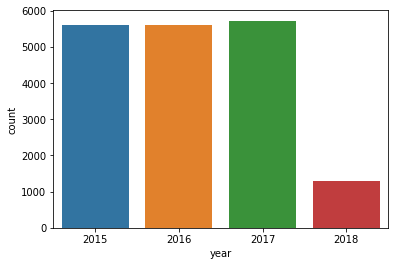

In [14]:
# Checking out total avocado in each year
print(data['year'].value_counts())
sns.countplot(x='year', data=data)
plt.show()

We can see that 5722 records of avocado data are in the year 2017 whereas 1296 records of avocado data in the year 2018.
We observe the records of avocado in the years 2015 and 2016 respectively is nearly same as the year of 2017. 

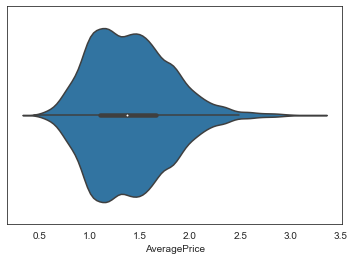

In [15]:
# Checking the distribution of price using violin plot
sns.set_style('white')
sns.violinplot(data['AveragePrice'])
plt.show()

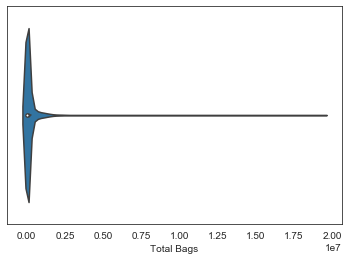

In [16]:
# Checking the distribution of total bags using violin plot
sns.violinplot(data['Total Bags'])
plt.show()

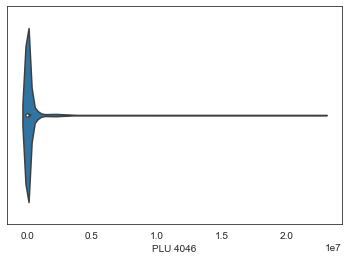

In [17]:
# Checking the distribution of PLU 4046 using violin plot
sns.violinplot(data['PLU 4046'])
plt.show()

### Bivariate Analysis

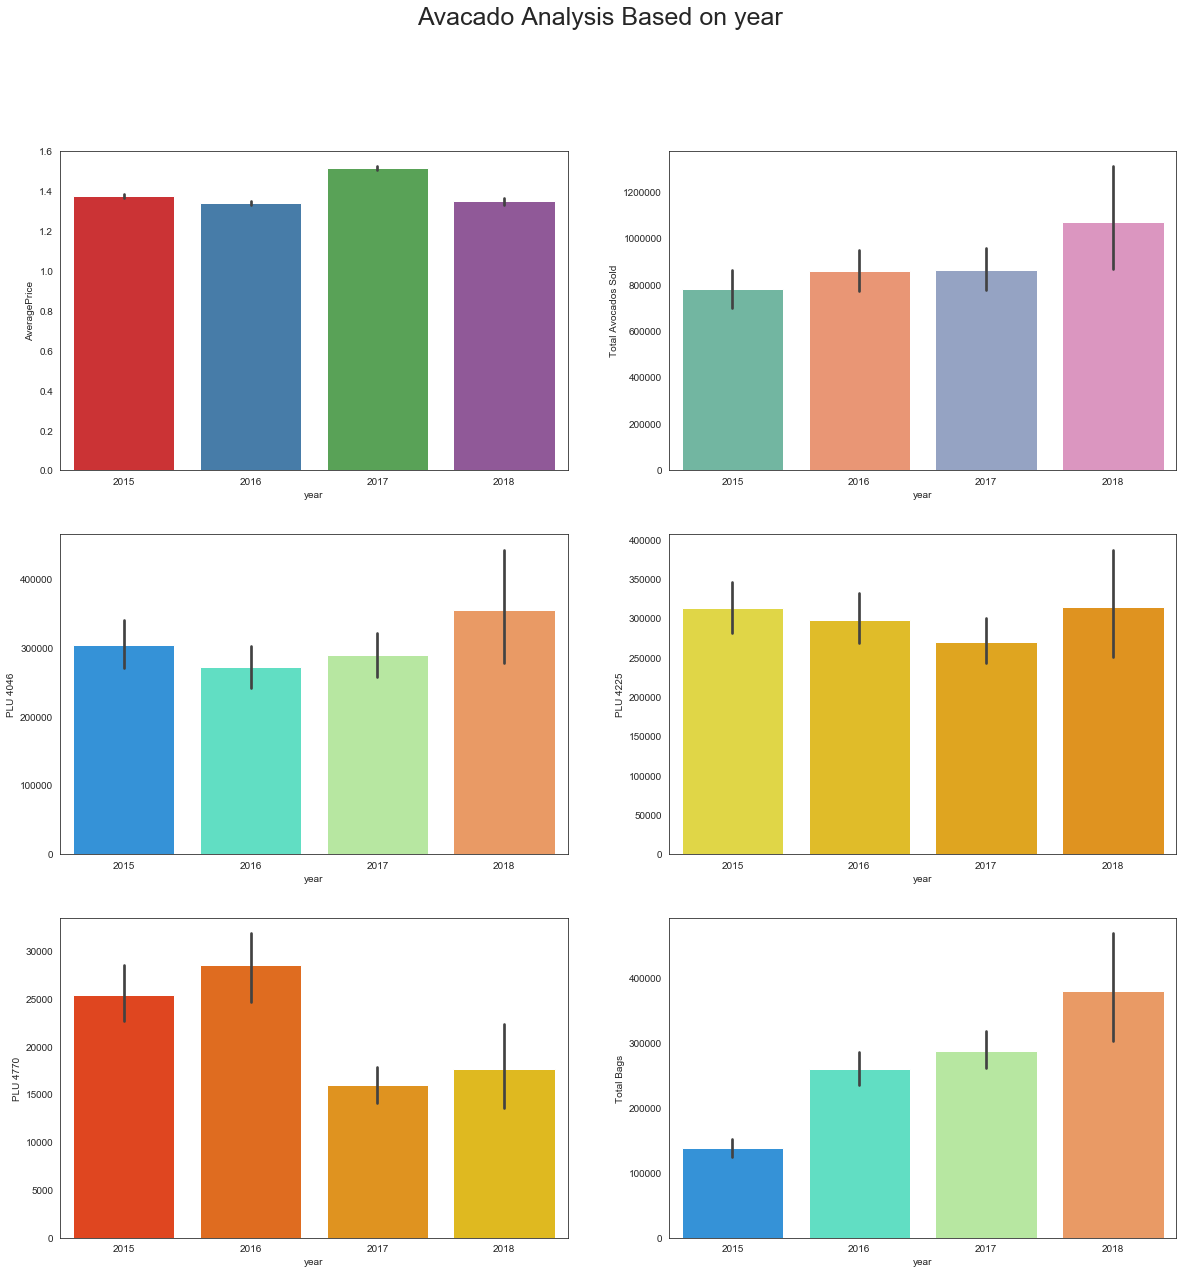

In [18]:
# Plotting year with different data parameters
fig, axes = plt.subplots(3, 2, figsize=(20, 20)) 

# Adding a centered title to the figure using suptitle
fig.suptitle('Avacado Analysis Based on year', fontsize=25)
sns.set_style('whitegrid')

# Plotting Year vs. Average price relationship using bar plot
sns.barplot(ax=axes[0, 0], x='year', y='AveragePrice', data=data, palette="Set1")

# Plotting Year vs. Total avocados sold relationship using bar plot
sns.barplot(ax=axes[0, 1], x='year', y='Total Avocados Sold', data=data, palette="Set2")

# Plotting Year vs. PLU 4046 relationship using bar plot
sns.barplot(ax=axes[1, 0], x='year', y='PLU 4046', data=data, palette="rainbow")

# Plotting Year vs. PLU 4225 relationship using bar plot
sns.barplot(ax=axes[1, 1], x='year', y='PLU 4225', data=data, palette="Wistia")

# Plotting Year vs. PLU 4770 relationship using bar plot
sns.barplot(ax=axes[2, 0], x='year', y='PLU 4770', data=data, palette="autumn")

# Plotting Year vs. Total Bags relationship using bar plot
sns.barplot(ax=axes[2, 1], x='year', y='Total Bags', data=data, palette="rainbow")

Observations:

(1) Maximum average price of avocado is in 2017 and minimum average price in 2016. whereas average price of avocado is 2015 more compare to 2018.

(2) Maximum avocados were sold in 2018 and minimum No. of avocados were sold in 2015. whereas No. of avocados were sold in 2016 and 2017 were nearly same.

(3) 
(i)In 2018, PLU 4046 were sold more compared to 2015. 
(ii) In 2015, PLU 4046 were sold more compared to 2017. 
(iii) In 2017, PLU 4046 were sold more compared to 2016.
as result we can see In 2018, were sold maximum as compared to 2015, 2016 and 2018. 
Similarly In 2016, were sold minimum compared to 2015, 2017 and 2018.

(4) 
(i)In 2018, PLU 4225 were sold maximum compared to 2015, 2016 and 2017. 
(ii) In 2017, were sold minimum compared to 2015, 2016 and 2018.

(5) 
(i)In 2016, PLU 4770 were sold maximum compared to 2015, 2017 and 2018. 
(ii) In 2017, were sold minimum compared to 2015, 2016 and 2018.

(6) Total No. of Bags were used more in 2018.

AxesSubplot(0.125,0.657941;0.775x0.222059)
AxesSubplot(0.125,0.391471;0.775x0.222059)
AxesSubplot(0.125,0.125;0.775x0.222059)


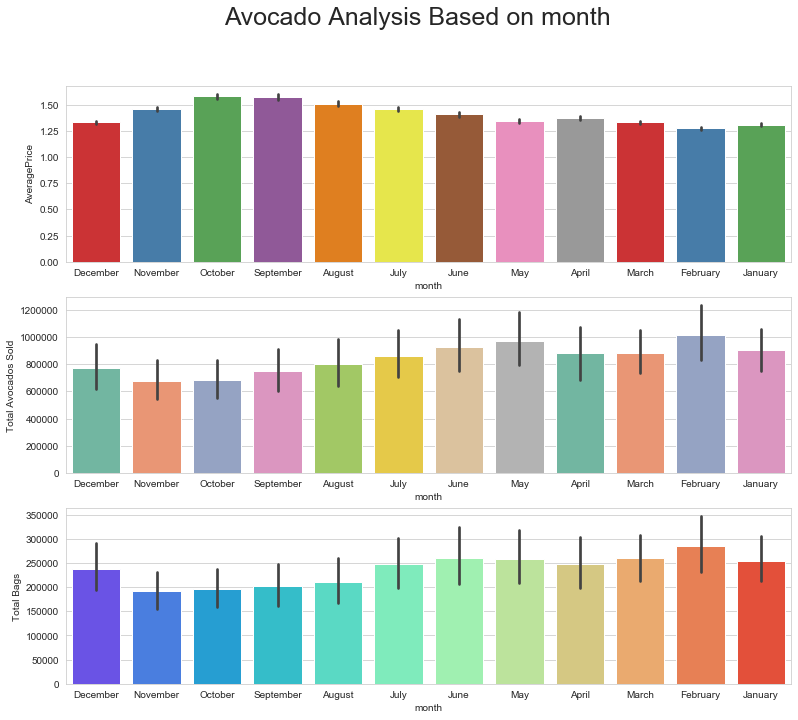

In [19]:
plt.figure(figsize=(13, 11))
sns.set_style('whitegrid')
plt.xticks(np.linspace(1,2,5))
plt.suptitle('Avocado Analysis Based on month', fontsize=25)
plt.subplot(311)
print(sns.barplot(x='month', y='AveragePrice', data=data, palette="Set1"))

plt.subplot(312)
print(sns.barplot(x='month', y='Total Avocados Sold', data=data, palette="Set2"))

plt.subplot(313)
print(sns.barplot(x='month', y='Total Bags', data=data, palette="rainbow"))

Observations:
    
(1) We can observe average price of avocados is higher in the month of October, while lesser in the month of February.

(2) Maximum No. of avocados sold in the month of February, whereas minimum No. of avocados were sold in October.

(3) Maximun No. of Bags were used in February, whereas minimum No. of Bags were used in November.

Text(0, 0.5, 'Total Avocados Sold')

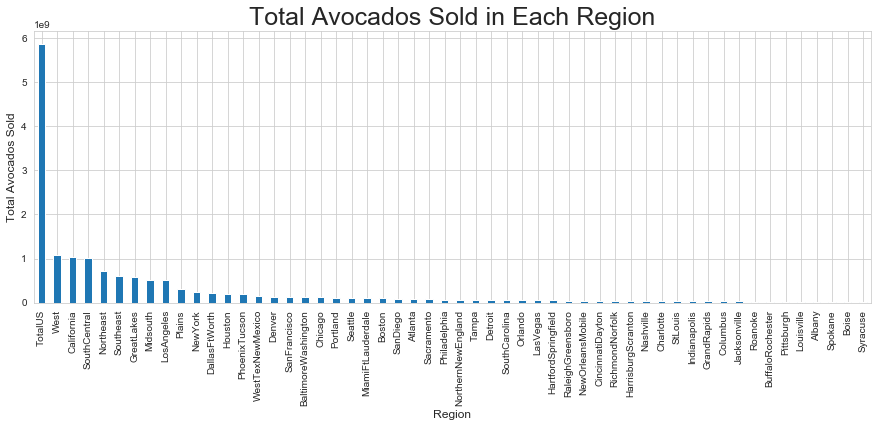

In [20]:
# Checking the ratio of total avocados sold in each region
plt.figure(figsize=(15, 30))
sns.set_style('whitegrid')
plt.xticks(np.linspace(1,2,5))
plt.title('Total Avocados Sold in Each Region', {'fontsize':25})
data.groupby("region")["Total Avocados Sold"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(15,5))
plt.xlabel('Region', {'fontsize':'large'})
plt.ylabel('Total Avocados Sold', {'fontsize':'large'})

Observation:

We can see that more No. of Avocados were sold in TotalUS region and less No. of Avocados were sold in regions like RaleighGreensboro, CincinnatiDay, StLouis etc.

Text(0, 0.5, 'Total Avocados Sold')

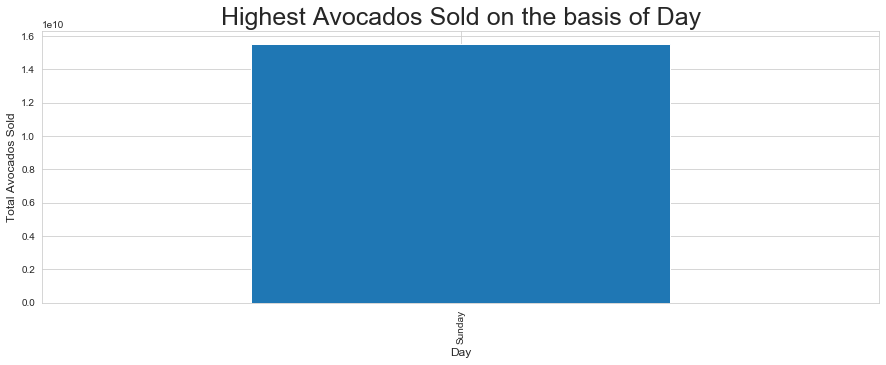

In [21]:
# Lets check the week got highest Avocado sell in 2018
data.groupby("day")["Total Avocados Sold"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(15,5))
plt.title('Highest Avocados Sold on the basis of Day', {'fontsize':25})
plt.xlabel('Day', {'fontsize':'large'})
plt.ylabel('Total Avocados Sold', {'fontsize':'large'})

Observation:

Maximum No. of avocados were sold on Sunday.

Text(0.5, 1.0, 'Average price in different regions')

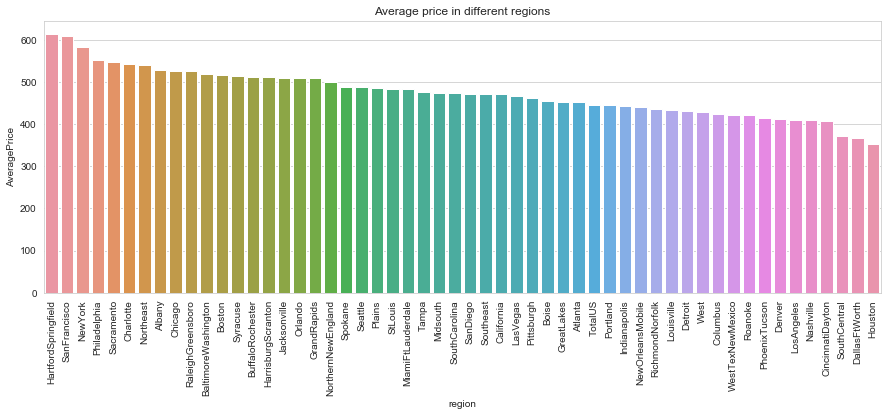

In [22]:
# How average price varies by comparing with different regions
region = data.groupby('region')['AveragePrice'].sum().sort_values(ascending=False).reset_index()

# Visualizing by bar plot
plt.figure(figsize=(15, 5))
ax=sns.barplot(region['region'], region['AveragePrice'])
plt.xticks(rotation=90)
plt.title("Average price in different regions")

Observation:

The average price in HartfordSpringfield is maximum whereas the average price in Houston is minimum

### Multivariate Analysis

In [23]:
data.describe()

,AveragePrice,Total Avocados Sold,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Observations:
    
(1). There is not much difference between the mean and median (i.e, 50%) values.

(2). The standard deviation value for XLarge Bags is high.

(3). There can be outliers presents in this dataset as the difference between 75th percentile and max values are bit higher for some columns.

In [24]:
# Check correlation of the dataset
corr=data.corr()
corr

,AveragePrice,Total Avocados Sold,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Avocados Sold,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
PLU 4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
PLU 4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
PLU 4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


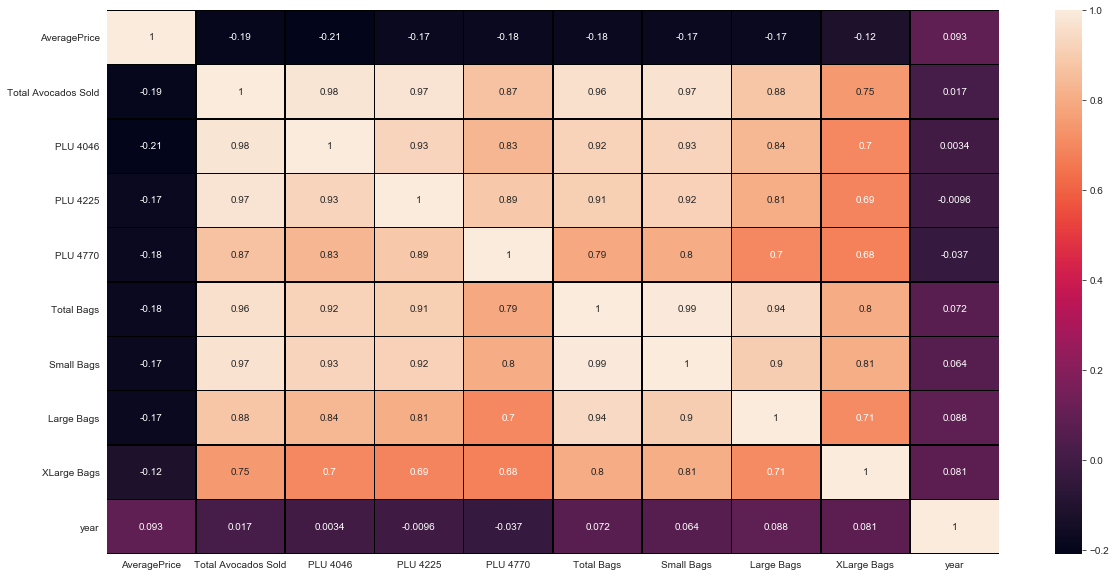

In [25]:
# Plotting heatmap to understand the visualization of correlation
plt.figure(figsize=(20, 10))
sns.heatmap(corr, linewidth=0.5, linecolor='black', annot=True)
plt.show()

Observations:
    
(1). Most of the columns are highly positive correlated with each other.

(2). PLU 4046, PLU 4225, PLU 4770 and Total Avocados solds are the columns that are having a value of 98%, 97% and 87% respectively.

(3). Year column is the most negatively corelated column among all bhut values are very less.

(4). Positely correlated columns have high impact with the Target variable, whereas negatively correlated columns have less or zero impact with thw target variable.

### Converting Categorical data into numerical data

In [26]:
data.dtypes

month                   object
day                     object
AveragePrice           float64
Total Avocados Sold    float64
PLU 4046               float64
PLU 4225               float64
PLU 4770               float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
year                     int64
region                  object
dtype: object

month, day and region are the categorical columns. we need to convert them into numerical column using LabelEncoder

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col = ['month', 'day', 'region']
for i in col:
    data[i]=le.fit_transform(data[i])

In [28]:
data.head()

,month,day,AveragePrice,Total Avocados Sold,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,2,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,2,0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,2,0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,2,0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,9,0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0


In [29]:
data.dtypes

month                    int32
day                      int32
AveragePrice           float64
Total Avocados Sold    float64
PLU 4046               float64
PLU 4225               float64
PLU 4770               float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
year                     int64
region                   int32
dtype: object

Now all columns are Numerical.

### Splitting and Scaling

In [30]:
x = data.drop('region', axis=1)
y = data['region']

## Checking skewness

In [31]:
data.skew()

month                   0.027653
day                     0.000000
AveragePrice            0.580303
Total Avocados Sold     9.007687
PLU 4046                8.648220
PLU 4225                8.942466
PLU 4770               10.159396
Total Bags              9.756072
Small Bags              9.540660
Large Bags              9.796455
XLarge Bags            13.139751
year                    0.215339
region                  0.000030
dtype: float64

## Treating skewness using log-transform

In [32]:
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

# The skewness has been treated and the data is ready for model training and testing

## Scaling the data

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.03050323,  0.        , -0.11191784, ..., -0.66974686,
        -0.64552605, -1.22128204],
       [-1.03050323,  0.        , -0.06002047, ..., -0.65827941,
        -0.64552605, -1.22128204],
       [-1.03050323,  0.        , -1.25556016, ..., -0.6437429 ,
        -0.64552605, -1.22128204],
       ...,
       [-0.43308111,  0.        ,  1.15374345, ..., -0.87238014,
        -0.64552605,  1.97050371],
       [-0.43308111,  0.        ,  1.2793746 , ..., -0.82978729,
        -0.64552605,  1.97050371],
       [-0.43308111,  0.        ,  0.6003593 , ..., -0.99542886,
        -0.64552605,  1.97050371]])

## Building the model (Classification)

In [34]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [35]:
# Creating train test split using best random state
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=28)

## Finding out the Best Model

In [36]:
# Importing various classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# Initializing the instance of the model
LR = LogisticRegression()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()

In [38]:
models = []
models.append(('LogisticRegression',LR))
models.append(('GaussianNB',gnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))

In [39]:
# Importing required modules
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [40]:
Model = []
Score = []
CV_Score = []

for name, model in models:
    print('----------------------------',name,'------------------------------')
    print('\n')
    Model.append(name)
    model.fit(x_train, y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    
    AS=accuracy_score(y_test, pre)
    print('accuracy_score: ', AS)
    Score.append(AS*100)
    print('\n')
    
    cvs=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ', cvs)
    CV_Score.append(cvs*100)
    print('\n')
   
    print('Classification report: \n')
    print(classification_report(y_test, pre))
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test, pre)
    print(cm)
    print('\n')

---------------------------- LogisticRegression ------------------------------


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy_score:  0.37972602739726025


cross_val_score:  0.23759995795432784


Classification report: 

              precision    recall  f1-score   support

           0       0.51      0.29      0.37        72
           1       0.19      0.22      0.20        82
           2       0.42      0.32      0.36        79
           3       0.27      0.22      0.25        63
           4       0.34      0.41      0.37        66
           5       0.24      0.20      0.22        56
           6       0.66      0.78      0.71        77
           7       0.38      0.54      0.45        61


In [41]:
# Result store in DataFrame
Result = pd.DataFrame({'Model':Model, 'Accuracy Score':Score, 'CV Score':CV_Score})
Result

,Model,Accuracy Score,CV Score
0,LogisticRegression,37.972603,23.759996
1,GaussianNB,4.602740,3.496077
2,DecisionTreeClassifier,79.479452,52.802036
3,KNeighborsClassifier,75.424658,42.363294


From the above algorithms, we can say that the DecisionTreeClassifier is working well by giving an accuracy of 79.47% and cross validation score of 52.80%. Now we will perform Hyperparameter Tuning to find the best parameters and improve the accuracy of the model

### Hyperparameter Tuning

In [43]:
# Creating parameter list to pass GridSearchCV
param_dist= {
    'criterion':["gini", "entropy"], 
    'max_depth':[1,2,3,4,5,6,7,None]
}

In [44]:
# Using GridSearchCV to run the parameters and checking the accuracy
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
grid=GridSearchCV(dtc, param_grid=param_dist, cv=10, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': None}
0.7931361318974339


As we can see the accuracy of the model has been decrease. 

In [46]:
# Saving the model
from sklearn.externals import joblib
joblib.dump(dtc, 'Avocado_classification.pkl')

['Avocado_classification.pkl']

# Building the model (Regression)

In [47]:
x = data.drop('AveragePrice', axis=1)
y = data['AveragePrice']

In [48]:
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

# The skewness has been treated and the data is ready for model training and testing

### Scaling the data

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.03050323,  0.        , -0.10728205, ..., -0.64552605,
        -1.22128204, -1.7002522 ],
       [-1.03050323,  0.        , -0.1759487 , ..., -0.64552605,
        -1.22128204, -1.7002522 ],
       [-1.03050323,  0.        ,  0.15869039, ..., -0.64552605,
        -1.22128204, -1.7002522 ],
       ...,
       [-0.43308111,  0.        , -0.77890112, ..., -0.64552605,
         1.97050371,  1.70081131],
       [-0.43308111,  0.        , -0.70779758, ..., -0.64552605,
         1.97050371,  1.70081131],
       [-0.43308111,  0.        , -0.67454176, ..., -0.64552605,
         1.97050371,  1.70081131]])

In [50]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [51]:
# Creating train test split using best random state
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=28)

## Finding out the best model

In [52]:
# Importing various Regression models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [54]:
# Initializing the instance of the model
Lr = LinearRegression()
svr = SVR()
dtr = DecisionTreeRegressor()
knr = KNeighborsRegressor()

In [55]:
models = []
models.append(('LinearRegression',Lr))
models.append(('Support Vector Regressor',svr))
models.append(('Decision Tree Regressor',dtr))
models.append(('KNeighbors Regressor',knr))

In [56]:
# Import required metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [57]:
Model = []
Score = []
CV_Score = []
MAE = []
MSE = []
RMSE = []

for name, model in models:
    print('----------------------------',name,'------------------------------')
    print('\n')
    Model.append(name)
    model.fit(x_train, y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    
    AS=r2_score(y_test, pre)
    print('accuracy_score: ', AS)
    Score.append(AS*100)
    print('\n')
    
    cvs=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score: ', cvs)
    CV_Score.append(cvs*100)
    print('\n')
    
    mae=mean_absolute_error(y_test, pre)
    print('Mean Absolute Error: ', mae)
    MAE.append(mae)
    print('\n')
    
    mse=mean_squared_error(y_test, pre)
    print('Mean Squared Error: ', mse)
    MSE.append(mse)
    print('\n')
    
    rmse=np.sqrt(mean_squared_error(y_test, pre))
    print('Root Mean Squared  Error: ', rmse)
    RMSE.append(rmse)
    print('\n')

---------------------------- LinearRegression ------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


accuracy_score:  0.4779803991838626


cross_val_score:  -0.0652105002824706


Mean Absolute Error:  0.2309498989661067


Mean Squared Error:  0.08574594378240574


Root Mean Squared  Error:  0.2928240833374293


---------------------------- Support Vector Regressor ------------------------------


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


accuracy_score:  0.7435744049544935


cross_val_score:  0.05969431916812205


Mean Absolute Error:  0.1511559721686759


Mean Squared Error:  0.042119979063556724


Root Mean Squared  Error:  0.2052315255109622


---------------------------- Decision Tree Regressor ------------------------------


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                    

In [58]:
# store the result in DataFrame
result = pd.DataFrame({'Model':Model, 'Accuracy_score': Score,'Cross_val_score':CV_Score,'Mean_absolute_error':MAE,
                     'Mean_squared_error':MSE,'Root_Mean_Squared_error':RMSE})
result

,Model,Accuracy_score,Cross_val_score,Mean_absolute_error,Mean_squared_error,Root_Mean_Squared_error
0,LinearRegression,47.798040,-6.521050,0.230950,0.085746,0.292824
1,Support Vector Regressor,74.357440,5.969432,0.151156,0.042120,0.205232
2,Decision Tree Regressor,75.278331,-75.504331,0.131808,0.040607,0.201513
3,KNeighbors Regressor,82.687428,-25.833186,0.119075,0.028437,0.168634


From the above algorithms, we can say that the KNeighbors Regressor is working well by giving an accuracy of 82.68%.  

In [64]:
# Saving the model
from sklearn.externals import joblib
joblib.dump(knr, 'Avocado_regression.pkl')

['Avocado_regression.pkl']